# 06_03 THE BEST ESTIMATOR_V5

## MODELAR ALGORITMO DE CLASIFICACIÓN 

Vamos a parametrizar el algoritmo con mejor roc_auc del entrenamiento y evaluación con XGBClassifier sin preselección de variables

XGBClassifier()

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Crear datasets de entrenamiento y validación
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
import scikitplot as skplt

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTACIÓN DE DATOS

## CARGAR LOS DATOS

In [2]:
df_tablon = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df_tablon.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0


## SEPARAR PREDICTORAS Y TARGET

In [3]:
x = df_tablon.drop(columns= 'produccion').copy()
y = df_tablon.produccion.copy()

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [4]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state = 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES 

In [5]:
pipe = Pipeline([('algoritmo', XGBClassifier())])

grid = [
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]
         }
       ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [6]:
grid_search = GridSearchCV( estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           verbose=0,
                           n_jobs= -1
                        )

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__reg_alpha,...,param_algoritmo__verbosity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
120,0.237701,0.013760,0.011197,0.003916,"XGBClassifier(base_score=None, booster=None, c...",0.025,5,500,-1,0,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.722222,1.000000,0.777778,1.0,0.6250,0.825000,0.151025,1
156,0.261889,0.018517,0.007105,0.001355,"XGBClassifier(base_score=None, booster=None, c...",0.025,10,500,-1,0,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.722222,1.000000,0.777778,1.0,0.6250,0.825000,0.151025,1
192,0.259459,0.023970,0.017600,0.009332,"XGBClassifier(base_score=None, booster=None, c...",0.025,20,500,-1,0,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.722222,1.000000,0.777778,1.0,0.6250,0.825000,0.151025,1
27,0.586696,0.038745,0.018806,0.011289,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,1000,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.611111,1.000000,0.888889,1.0,0.5625,0.812500,0.189317,4
63,0.507730,0.047621,0.012813,0.006408,"XGBClassifier(base_score=None, booster=None, c...",0.01,10,1000,-1,0.1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.611111,1.000000,0.888889,1.0,0.5625,0.812500,0.189317,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,0.051198,0.006045,0.010472,0.003424,"XGBClassifier(base_score=None, booster=None, c...",0.01,10,100,-1,1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.388889,0.166667,0.444444,0.5,0.0000,0.300000,0.187906,421
82,0.049633,0.012800,0.009600,0.003194,"XGBClassifier(base_score=None, booster=None, c...",0.01,20,100,-1,1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.388889,0.166667,0.444444,0.5,0.0000,0.300000,0.187906,421
83,0.052011,0.007164,0.008000,0.000001,"XGBClassifier(base_score=None, booster=None, c...",0.01,20,100,-1,1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.333333,0.166667,0.444444,0.5,0.0000,0.288889,0.183922,430
11,0.056540,0.010962,0.013750,0.007092,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,100,-1,1,...,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.333333,0.166667,0.444444,0.5,0.0000,0.288889,0.183922,430


In [7]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.025, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

In [8]:
modelo.best_params_

{'algoritmo': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.025, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'algoritmo__learning_rate': 0.025,
 'algoritmo__max_depth': 5,
 'algoritmo__n_estimators': 500,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0,
 'algoritmo__reg_lambda': 0.01,
 'algoritmo__verbosity': 0}

In [9]:
modelo.best_score_

0.825

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [10]:
modelo_best_estimator = modelo

#### Guardar modelo, parámetros y score

In [11]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre el Train

In [12]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [13]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 0.8333333333333333
Accuracy: 0.9591836734693877
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.67      0.80         6

    accuracy                           0.96        49
   macro avg       0.98      0.83      0.89        49
weighted avg       0.96      0.96      0.96        49



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

### Predecir sobre la validación

In [14]:
pred = modelo.best_estimator_.predict(val_x)
pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]

### Evaluar sobre la validación

In [15]:
v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 0.7407407407407408
Roc AUC: 0.5833333333333334
Accuracy: 0.7619047619047619
Classification Report:              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.25      0.33      0.29         3

    accuracy                           0.76        21
   macro avg       0.57      0.58      0.57        21
weighted avg       0.79      0.76      0.78        21



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

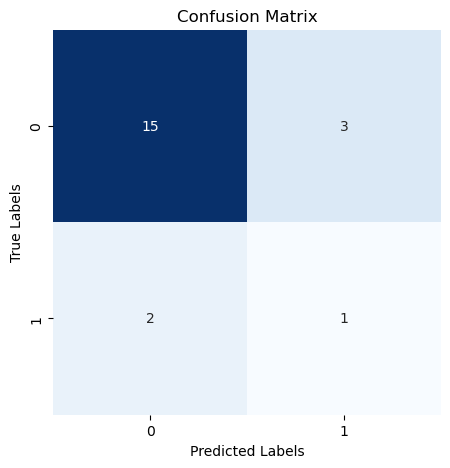

In [16]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Gain Chart

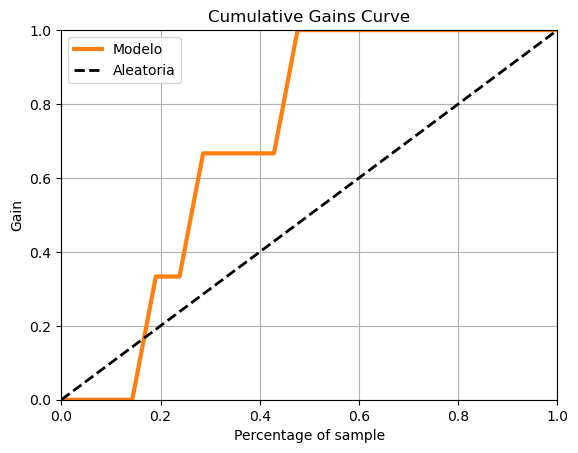

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()               
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

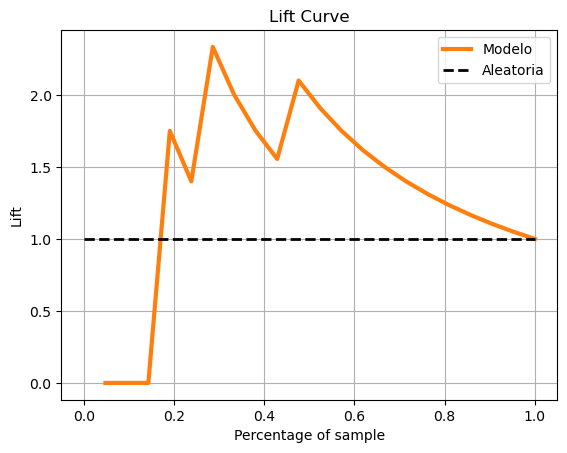

In [18]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()                
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

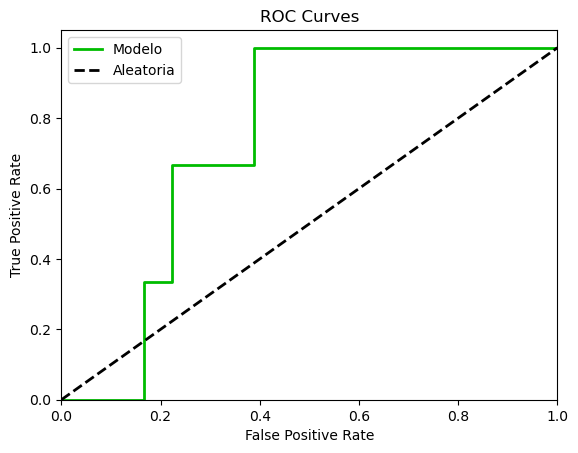

In [19]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [20]:
version_estimator = '_v05'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'XGBClassifier_v05.pickle'

In [21]:
m_best_estimator

'XGBClassifier'

In [22]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [23]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo XGBClassifier con parámetros para evitar el sobreajuste sin preselección de variables"
x_columns = list(x.columns)ht
y_target = y.name


In [24]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': v_roc_auc_proba,
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                        XGBClassifier
m_Best_paramans     {'algoritmo': XGBClassifier(base_score=None, b...
m_Best_Score                                                    0.825
t_accuracy                                                   0.959184
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                              0.740741
v_roc_auc                                                    0.583333
v_accuracy                                                   0.761905
v_report                          precision    recall  f1-score   ...
comentarios         Modelo XGBClassifier con parámetros para evita...
predictoras_X       [estacion, edad, e_infantil, acc_grave, int_qu...
target_y                                                   produccion
Name: XGBClassifier_v05.pickle, dtype: object

In [25]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [26]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: Vemos que la preselección de variables no ha ayudado a mejorar la predicción del modelo. 